<a href="https://colab.research.google.com/github/berilcankutlu/MediumBlogCodes/blob/main/Veri_%C3%96n_%C4%B0%C5%9Fleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub==0.3.12

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.11
    Uninstalling kagglehub-0.3.11:
      Successfully uninstalled kagglehub-0.3.11


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kunalgp/top-1000-most-played-spotify-songs-of-all-time")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/top-1000-most-played-spotify-songs-of-all-time


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [6]:
csv_path = os.path.join(path, "spotify_top_1000_tracks.csv")
df = pd.read_csv(csv_path)

In [7]:
df.head(10)

,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspire...,2018-02-09,95,https://open.spotify.com/track/3GCdLUSnKSMJhs4...,3GCdLUSnKSMJhs4Tj6CV3s,3.869767
1,Starboy,The Weeknd,Starboy,2016-11-25,90,https://open.spotify.com/track/7MXVkk9YMctZqd1...,7MXVkk9YMctZqd1Srtv4MB,3.840883
2,Señorita,Shawn Mendes,Señorita,2019-06-21,80,https://open.spotify.com/track/0TK2YIli7K1leLo...,0TK2YIli7K1leLovkQiNik,3.182667
3,Heat Waves,Glass Animals,Dreamland,2020-08-07,87,https://open.spotify.com/track/3USxtqRwSYz57Ew...,3USxtqRwSYz57Ewm6wWRMp,3.980083
4,Let Me Love You,DJ Snake,Encore,2016-08-05,87,https://open.spotify.com/track/0lYBSQXN6rCTvUZ...,0lYBSQXN6rCTvUZvg9S0lU,3.432433
5,La La La,Naughty Boy,La La La,2013-01-01,77,https://open.spotify.com/track/52gvlDnre9craz9...,52gvlDnre9craz9dKGObp8,3.679650
6,Apocalypse,Cigarettes After Sex,Cigarettes After Sex,2017-06-09,73,https://open.spotify.com/track/0yc6Gst2xkRu0eM...,0yc6Gst2xkRu0eMLeRMGCX,4.843600
7,Good For You,Selena Gomez,Revival (Deluxe),2015-10-09,80,https://open.spotify.com/track/5xdVqHtFS0eLuNp...,5xdVqHtFS0eLuNp4Z8Wbpa,3.688000
8,Baby,Justin Bieber,My World 2.0,2010-01-01,84,https://open.spotify.com/track/6epn3r7S14KUqlR...,6epn3r7S14KUqlReYr77hA,3.570667
9,There's Nothing Holdin' Me Back,Shawn Mendes,Illuminate (Deluxe),2017-04-20,88,https://open.spotify.com/track/7JJmb5XwzOO8jgp...,7JJmb5XwzOO8jgpou264Ml,3.324000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_name    1000 non-null   object 
 1   artist        1000 non-null   object 
 2   album         1000 non-null   object 
 3   release_date  1000 non-null   object 
 4   popularity    1000 non-null   int64  
 5   spotify_url   1000 non-null   object 
 6   id            1000 non-null   object 
 7   duration_min  1000 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [9]:
df.shape

(1000, 8)

In [10]:
df.isnull().sum()

,0
track_name,0
artist,0
album,0
release_date,0
popularity,0
spotify_url,0
id,0
duration_min,0


In [11]:
df.dropna(inplace=True)

In [12]:
df.drop(columns=['spotify_url', 'id'], inplace=True)

In [13]:
df.describe()

,popularity,duration_min
count,1000.000000,1000.000000
mean,56.669000,3.318516
std,28.192805,0.849591
min,0.000000,0.969150
25%,37.000000,2.754021
50%,68.000000,3.293833
75%,79.000000,3.745721
max,97.000000,9.497883


In [14]:
duplicate_df = df[df.duplicated()]
print("yinelenmiş değerler: ", duplicate_df.shape)

yinelenmiş değerler:  (0, 6)


In [15]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Yeni sütunlar
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

df.head()

,track_name,artist,album,release_date,popularity,duration_min,release_year,release_month
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspire...,2018-02-09,95,3.869767,2018.0,2.0
1,Starboy,The Weeknd,Starboy,2016-11-25,90,3.840883,2016.0,11.0
2,Señorita,Shawn Mendes,Señorita,2019-06-21,80,3.182667,2019.0,6.0
3,Heat Waves,Glass Animals,Dreamland,2020-08-07,87,3.980083,2020.0,8.0
4,Let Me Love You,DJ Snake,Encore,2016-08-05,87,3.432433,2016.0,8.0


In [16]:
top_artists = df['artist'].value_counts().head(10)
print(top_artists)


artist
The Weeknd         26
Taylor Swift       25
Avril Lavigne      21
Alan Walker        14
Selena Gomez       12
Ariana Grande      12
Justin Bieber      11
Ed Sheeran         11
Katy Perry          9
Imagine Dragons     9
Name: count, dtype: int64


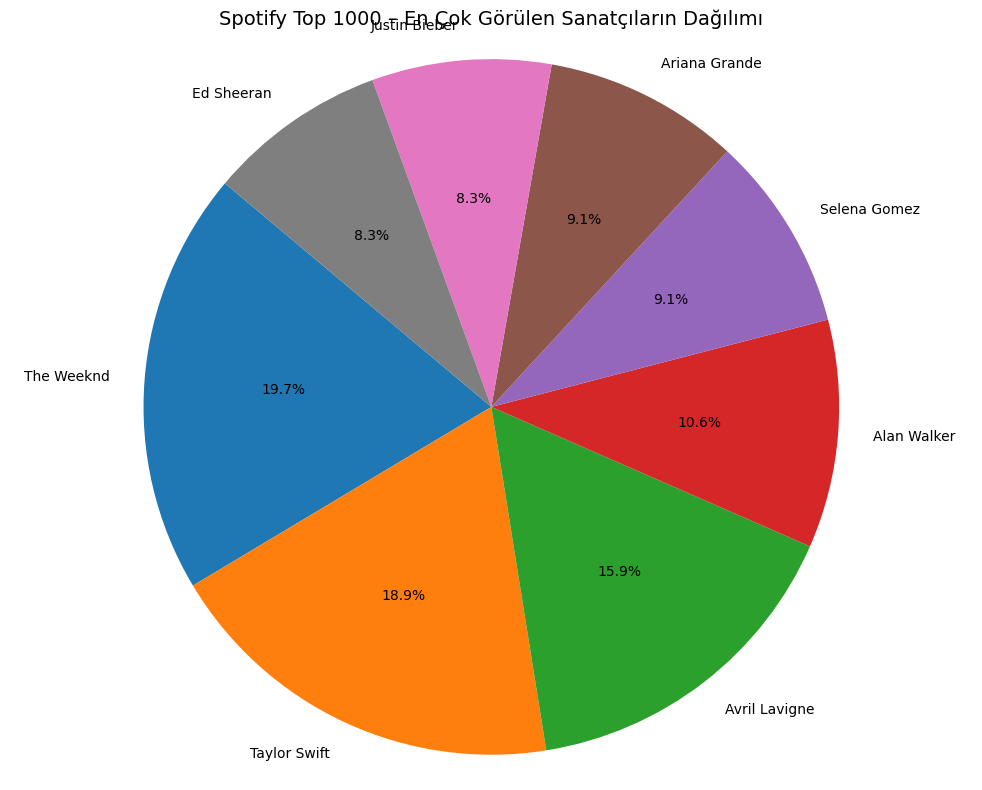

In [17]:
artist_counts = df['artist'].value_counts()

top_artists = artist_counts[artist_counts >= 10]

plt.figure(figsize=(10, 8))
plt.pie(top_artists, labels=top_artists.index, autopct='%1.1f%%', startangle=140)
plt.title("Spotify Top 1000 – En Çok Görülen Sanatçıların Dağılımı", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [18]:
def popularity_label(score):
    if score >= 85:
        return 'Very Popular'
    elif score >= 70:
        return 'Popular'
    else:
        return 'Less Popular'

df['popularity_label'] = df['popularity'].apply(popularity_label)
df.head()

,track_name,artist,album,release_date,popularity,duration_min,release_year,release_month,popularity_label
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspire...,2018-02-09,95,3.869767,2018.0,2.0,Very Popular
1,Starboy,The Weeknd,Starboy,2016-11-25,90,3.840883,2016.0,11.0,Very Popular
2,Señorita,Shawn Mendes,Señorita,2019-06-21,80,3.182667,2019.0,6.0,Popular
3,Heat Waves,Glass Animals,Dreamland,2020-08-07,87,3.980083,2020.0,8.0,Very Popular
4,Let Me Love You,DJ Snake,Encore,2016-08-05,87,3.432433,2016.0,8.0,Very Popular


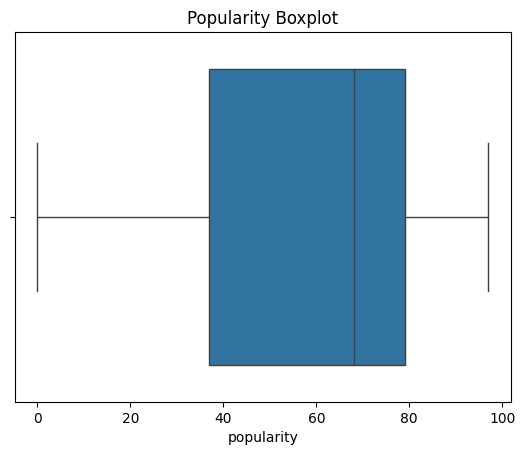

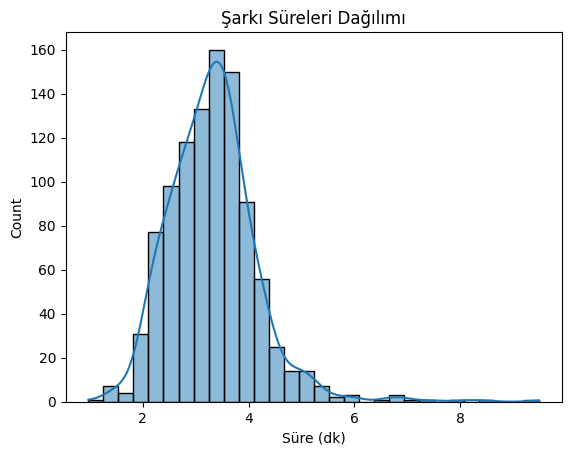

In [19]:
# Popularity dağılımı
sns.boxplot(x=df['popularity'])
plt.title("Popularity Boxplot")
plt.show()

# Duration dağılımı
sns.histplot(df['duration_min'], bins=30, kde=True)
plt.title("Şarkı Süreleri Dağılımı")
plt.xlabel("Süre (dk)")
plt.show()

In [20]:
# Aykırı değerleri sayısal olarak bulmak istersen:
Q1 = df['popularity'].quantile(0.25)
Q3 = df['popularity'].quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

# Aykırı değerler
outliers = df[(df['popularity'] < alt_sinir) | (df['popularity'] > ust_sinir)]

print("Aykırı Değer Sayısı:", outliers.shape[0])
print(outliers[['popularity']])

Aykırı Değer Sayısı: 0
Empty DataFrame
Columns: [popularity]
Index: []


In [21]:
# Aykırı değerleri sayısal olarak bulmak istersen:
Q1 = df['duration_min'].quantile(0.25)
Q3 = df['duration_min'].quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

# Aykırı değerler
outliers = df[(df['duration_min'] < alt_sinir) | (df['duration_min'] > ust_sinir)]

print("Aykırı Değer Sayısı:", outliers.shape[0])
print(outliers[['duration_min']])

Aykırı Değer Sayısı: 22
     duration_min
37       6.017100
43       5.326000
63       7.476217
64       8.069100
72       5.449333
227      0.969150
347      5.870000
446      5.271333
549      6.735100
592      5.659100
610      8.436667
622      7.035767
646      6.017067
671      6.563550
682      6.753550
689      6.909833
704      5.288217
710      9.497883
711      5.357300
736      5.448883
782      5.787100
799      5.235150


In [22]:
aykırısız_df = df[(df['duration_min'] >= alt_sinir)
                & (df['duration_min'] <= ust_sinir)]

aykırısız_df.describe()

,release_date,popularity,duration_min,release_year,release_month
count,955,978.000000,978.000000,955.000000,955.000000
mean,2018-01-27 13:10:06.910994688,56.703476,3.254952,2017.608377,6.149738
min,1981-01-01 00:00:00,0.000000,1.334667,1981.000000,1.000000
25%,2014-11-17 00:00:00,37.000000,2.746775,2014.000000,3.000000
50%,2018-12-14 00:00:00,68.000000,3.274608,2018.000000,6.000000
75%,2022-08-18 12:00:00,79.000000,3.700912,2022.000000,9.000000
max,2025-04-11 00:00:00,97.000000,5.228067,2025.000000,12.000000
std,NaN,28.211259,0.704845,5.729538,3.590342


In [23]:
df['duration_min'].sort_values(ascending=True)

,duration_min
227,0.969150
221,1.334667
821,1.415017
728,1.422667
832,1.426583
...,...
622,7.035767
63,7.476217
64,8.069100
610,8.436667
